### HR Analytics - Recomendation for Empolyee Promotion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("HR Analytics.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# # Variable Identification

Here, we are identifying the predictor(Input) and Target(output) variables. After identifying the variables, we have check the data type of the variable if any variable has worng data type, we need to assign it to right one. 

"is_promoted" variable is the target and rest of them are predictor variables. 

In [4]:
print(df.dtypes)

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


In [5]:
print(df.count())

employee_id             54808
department              54808
region                  54808
education               52399
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    50684
length_of_service       54808
KPIs_met >80%           54808
awards_won?             54808
avg_training_score      54808
is_promoted             54808
dtype: int64


# # Missing values Treatment

Here we can see in "education", "previous_year_rating" variables, values are missing.    

In [6]:
print("No. of Missing Values in education : ",df.education.isnull().sum())
print("No. of Missing Values in previous_year_rating : ",df.previous_year_rating.isnull().sum())

No. of Missing Values in education :  2409
No. of Missing Values in previous_year_rating :  4124


In [7]:
df.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [8]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

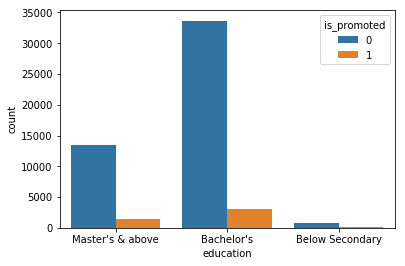

In [9]:
#lets compare education with other feaures
sns.countplot(df['education'], hue = df['is_promoted'])

#### Use sub models for missing values in education and use statistical medthod for missing values in previous_year_rating(need to compare it with all other feaures)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#### So, Here I'm using submodel(KNN) to impute the missing values.

* Separate the missing data with not missing data.
* Use the missing data as test data and remaining as train data.
* Use traget feature as education and remaning as Input features.
* Then train KNN on training data, and predict the missing values in test data.

In [11]:
sub_df = df
## Re-arranging the columns
print(sub_df.columns)
sub_df = sub_df[['employee_id', 'department', 'region' , 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted','education']]
sub_df.head()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,1,0,49,0,Master's & above
1,65141,Operations,region_22,m,other,1,30,5.0,4,0,0,60,0,Bachelor's
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,0,50,0,Bachelor's
3,2542,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,0,50,0,Bachelor's
4,48945,Technology,region_26,m,other,1,45,3.0,2,0,0,73,0,Bachelor's


In [12]:
sub_df.previous_year_rating.value_counts(dropna = False)

 3.0    18618
 5.0    11741
 4.0     9877
 1.0     6223
 2.0     4225
NaN      4124
Name: previous_year_rating, dtype: int64

* __Lets, Work on the fillna's in "previous_year_rating" using statistical methods first.__
* __So that, it will be easy to analyze it with other features.__

In [13]:
pre_df = sub_df[sub_df['previous_year_rating'].isnull() == False]
pre_df.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,1,0,49,0,Master's & above
1,65141,Operations,region_22,m,other,1,30,5.0,4,0,0,60,0,Bachelor's
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,0,50,0,Bachelor's
3,2542,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,0,50,0,Bachelor's
4,48945,Technology,region_26,m,other,1,45,3.0,2,0,0,73,0,Bachelor's


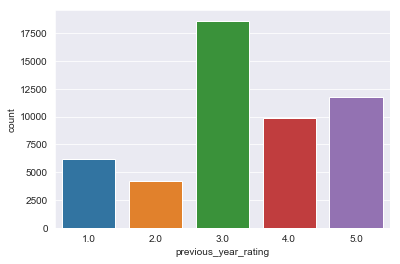

In [14]:
sns.set_style('darkgrid')
sns.countplot(x= pre_df.previous_year_rating)

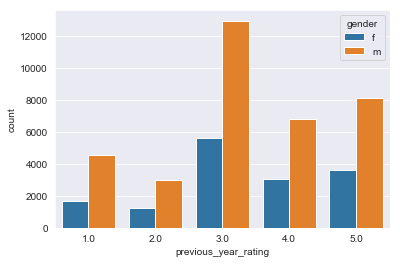

In [15]:
sns.set_style('darkgrid')
sns.countplot(x= pre_df.previous_year_rating,hue = pre_df.gender)

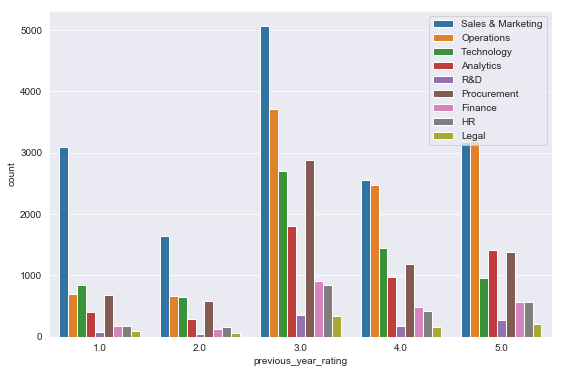

In [16]:
plt.figure(figsize= (9,6))
sns.countplot(x= pre_df.previous_year_rating,hue = pre_df.department)
plt.legend(loc = 'upper right')

plt.figure(figsize= (9,6))
g = sns.countplot(x= pre_1['previous_year_rating'],hue = pre_1.region)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()


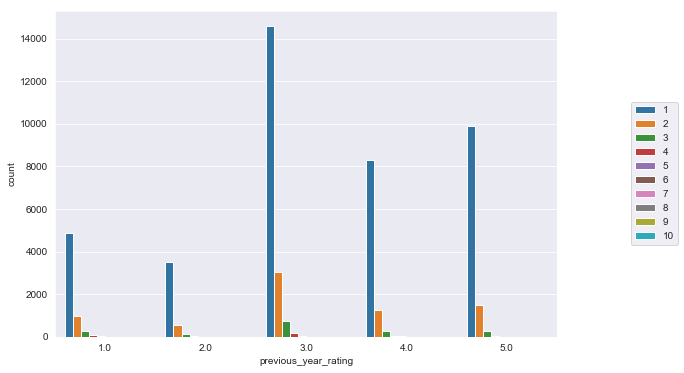

In [17]:
plt.figure(figsize= (9,6))
g = sns.countplot(x= pre_df['previous_year_rating'],hue = pre_df.no_of_trainings)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

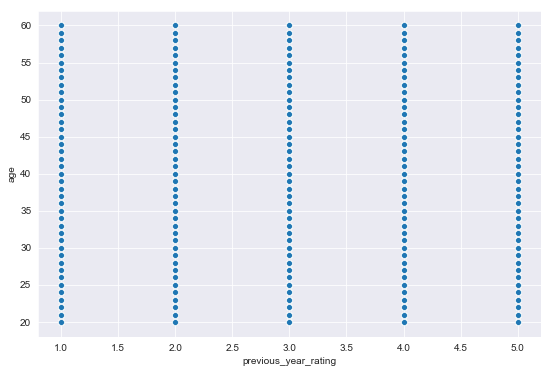

In [18]:
plt.figure(figsize= (9,6))
sns.scatterplot(data= pre_df, x = 'previous_year_rating', y = 'age')

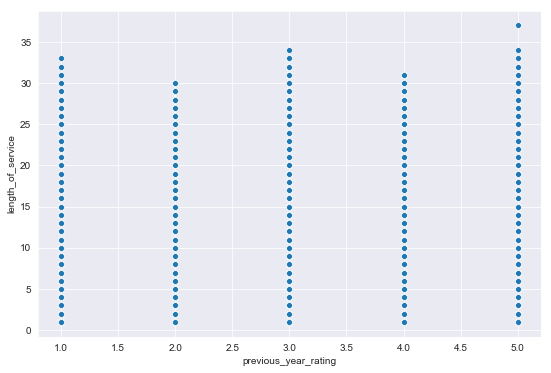

In [19]:
plt.figure(figsize= (9,6))
sns.scatterplot(data= pre_df, x = 'previous_year_rating', y = 'length_of_service')

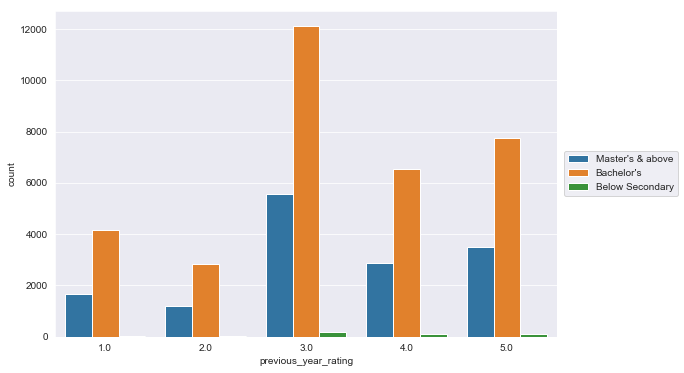

In [20]:
plt.figure(figsize= (9,6))
g = sns.countplot(x= pre_df['previous_year_rating'],hue = pre_df.education)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()


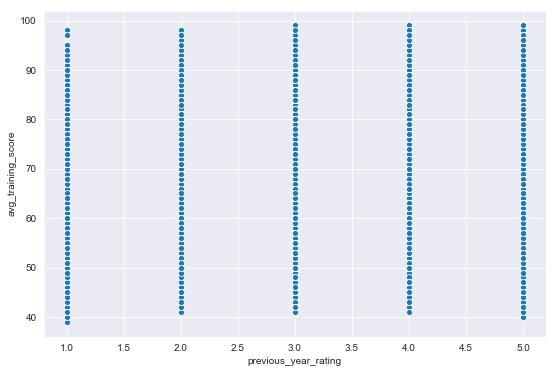

In [21]:
plt.figure(figsize= (9,6))
sns.scatterplot(data= pre_df, x = 'previous_year_rating', y = 'avg_training_score')

__So, as we can't find any clues to fill the null values in previous_year_rating so I assume that, employees joined on the same year. So, lets give zero rating.__

In [22]:
sub_df['previous_year_rating'] = sub_df['previous_year_rating'].fillna(value = 0)

In [23]:
print("No. of Missing Values in previous_year_rating : ",sub_df.previous_year_rating.isnull().sum())

No. of Missing Values in previous_year_rating :  0


__Done with previous_year_rating, Some features are not encoded, so need to encode some features for creating submodel for filing missig values in education feature.__

##   Label Encoding vs OneHotEncoding
* When we apply the label encoding, there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder.
* What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. 
* Apply OneHotEncode when feature is not ordinal.
* LabelEncoder is for ordinal data, while OHE is for nominal data.
* 
* Here, education feature is ordinal variable so lets use LabelEncoder and to avoid complex data, will use LabelEncoder for region and gender             features. 
* For department and recruitment_channel features lets use OHE.


In [24]:
pd.get_dummies(df['region']).shape

(54808, 34)

#### * Before we mean encode the Region feature we have to encode education feature because it uses the means of target variables, it is ordinal then label encoding is applied on it.


In [25]:
# Working on the mean encoding
a = sub_df.region.value_counts()
a = a.to_frame()
a = a.rename_axis(['Region']).reset_index(level = 0)
a.columns = [['Region','Count']]
a.head()

,Region,Count
0,region_2,12343
1,region_22,6428
2,region_7,4843
3,region_15,2808
4,region_13,2648


In [26]:
sub_df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [27]:
mapping = {'Master\'s & above':3,'Bachelor\'s':2,'Below Secondary':1}
for keys in mapping:
    mapping[keys] = int(mapping[keys])
sub_df['education'] = sub_df['education'].map(mapping)
sub_df.groupby('region')['education'].mean()

region
region_1     2.427852
region_10    2.610248
region_11    2.216886
region_12    2.060241
region_13    2.334877
region_14    2.205224
region_15    2.247230
region_16    2.168085
region_17    2.266836
region_18    2.000000
region_19    2.148148
region_2     2.285814
region_20    2.270907
region_21    2.173697
region_22    2.258350
region_23    2.427201
region_24    2.185404
region_25    2.323567
region_26    2.148148
region_27    2.172063
region_28    2.431929
region_29    2.200000
region_3     2.343023
region_30    2.114907
region_31    2.222705
region_32    2.051103
region_33    2.252788
region_34    2.136986
region_4     2.475603
region_5     2.214756
region_6     2.022189
region_7     2.336289
region_8     2.277259
region_9     2.301075
Name: education, dtype: float64

In [28]:
reg_dict = dict()
reg_dict = sub_df.groupby('region')['education'].mean()

In [29]:
sub_df.region = sub_df.region.map(reg_dict)
sub_df.region.unique()

array([2.33628893, 2.25834971, 2.14814815, 2.42720139, 2.28581369,
       2.27090695, 2.1369863 , 2.42785235, 2.47560259, 2.2       ,
       2.22270505, 2.24722965, 2.20522388, 2.21688613, 2.21475626,
       2.43192869, 2.26683609, 2.33487654, 2.16808511, 2.32356688,
       2.61024845, 2.17206349, 2.11490683, 2.06024096, 2.17369727,
       2.27725857, 2.05110337, 2.02218935, 2.2527881 , 2.18540434,
       2.34302326, 2.30107527, 2.        ])

In [30]:
sub_df.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education
0,65438,Sales & Marketing,2.336289,f,sourcing,1,35,5.0,8,1,0,49,0,3.0
1,65141,Operations,2.258350,m,other,1,30,5.0,4,0,0,60,0,2.0
2,7513,Sales & Marketing,2.148148,m,sourcing,1,34,3.0,7,0,0,50,0,2.0
3,2542,Sales & Marketing,2.427201,m,other,2,39,1.0,10,0,0,50,0,2.0
4,48945,Technology,2.148148,m,other,1,45,3.0,2,0,0,73,0,2.0


__So, Done with the mean encoding of region feature, now encode other features aswell.
Lets take department feature which is nominal, so use oneHot encode.__

In [31]:
df_dep = pd.DataFrame()
df_dep = pd.get_dummies(sub_df['department'])
df_dep.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [32]:
sub_df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [33]:
sub_df = pd.concat([sub_df,df_dep], axis= 1)
sub_df.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,education,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,Sales & Marketing,2.336289,f,sourcing,1,35,5.0,8,1,...,3.0,0,0,0,0,0,0,0,1,0
1,65141,Operations,2.258350,m,other,1,30,5.0,4,0,...,2.0,0,0,0,0,1,0,0,0,0
2,7513,Sales & Marketing,2.148148,m,sourcing,1,34,3.0,7,0,...,2.0,0,0,0,0,0,0,0,1,0
3,2542,Sales & Marketing,2.427201,m,other,2,39,1.0,10,0,...,2.0,0,0,0,0,0,0,0,1,0
4,48945,Technology,2.148148,m,other,1,45,3.0,2,0,...,2.0,0,0,0,0,0,0,0,0,1


__lets drop the department column which we encoded and droping another feature which is encoded, as we did onehot encode t shoudld be n-1 features, where n is the total no.of categories.__ 

In [34]:
sub_df = sub_df.drop(columns= {'department','R&D'})

In [35]:
sub_df.head()

,employee_id,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,is_promoted,education,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology
0,65438,2.336289,f,sourcing,1,35,5.0,8,1,0,...,0,3.0,0,0,0,0,0,0,1,0
1,65141,2.258350,m,other,1,30,5.0,4,0,0,...,0,2.0,0,0,0,0,1,0,0,0
2,7513,2.148148,m,sourcing,1,34,3.0,7,0,0,...,0,2.0,0,0,0,0,0,0,1,0
3,2542,2.427201,m,other,2,39,1.0,10,0,0,...,0,2.0,0,0,0,0,0,0,1,0
4,48945,2.148148,m,other,1,45,3.0,2,0,0,...,0,2.0,0,0,0,0,0,0,0,1


Now, lets encode the other features aswell.

In [36]:
sub_df['gender'] = le.fit_transform(sub_df.gender)
sub_df.head()

,employee_id,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,is_promoted,education,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology
0,65438,2.336289,0,sourcing,1,35,5.0,8,1,0,...,0,3.0,0,0,0,0,0,0,1,0
1,65141,2.258350,1,other,1,30,5.0,4,0,0,...,0,2.0,0,0,0,0,1,0,0,0
2,7513,2.148148,1,sourcing,1,34,3.0,7,0,0,...,0,2.0,0,0,0,0,0,0,1,0
3,2542,2.427201,1,other,2,39,1.0,10,0,0,...,0,2.0,0,0,0,0,0,0,1,0
4,48945,2.148148,1,other,1,45,3.0,2,0,0,...,0,2.0,0,0,0,0,0,0,0,1


In [37]:
sub_df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [38]:
sub_df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [39]:
df_rec = pd.DataFrame()
df_rec = pd.get_dummies(sub_df['recruitment_channel'])
df_rec.head()

,other,referred,sourcing
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [40]:
sub_df = pd.concat([sub_df,df_rec],sort= False, axis= 1)
sub_df.head()

,employee_id,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,referred,sourcing
0,65438,2.336289,0,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,1,0,0,0,1
1,65141,2.258350,1,other,1,30,5.0,4,0,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,2.148148,1,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2542,2.427201,1,other,2,39,1.0,10,0,0,...,0,0,0,0,0,1,0,1,0,0
4,48945,2.148148,1,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,1,1,0,0


In [41]:
sub_df = sub_df.drop(columns= {'recruitment_channel','referred'})
sub_df.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing
0,65438,2.336289,0,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,1,0,0,1
1,65141,2.258350,1,1,30,5.0,4,0,0,60,...,0,0,0,0,1,0,0,0,1,0
2,7513,2.148148,1,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,1,0,0,1
3,2542,2.427201,1,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,1,0,1,0
4,48945,2.148148,1,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,1,0


__Done with the encoding part, next step is to re-arrange the columns and train the model.__

In [42]:
sub_df.columns

Index(['employee_id', 'region', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'education',
       'Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'Sales & Marketing', 'Technology', 'other', 'sourcing'],
      dtype='object')

In [43]:
sub_df = sub_df[['employee_id', 'region', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'Sales & Marketing', 'Technology', 'other', 'sourcing','education']]
sub_df.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing,education
0,65438,2.336289,0,1,35,5.0,8,1,0,49,...,0,0,0,0,0,1,0,0,1,3.0
1,65141,2.258350,1,1,30,5.0,4,0,0,60,...,0,0,0,1,0,0,0,1,0,2.0
2,7513,2.148148,1,1,34,3.0,7,0,0,50,...,0,0,0,0,0,1,0,0,1,2.0
3,2542,2.427201,1,2,39,1.0,10,0,0,50,...,0,0,0,0,0,1,0,1,0,2.0
4,48945,2.148148,1,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,1,1,0,2.0


In [44]:
train_subdf = sub_df[sub_df['education'].isnull() == False]
test_subdf = sub_df[sub_df['education'].isnull() == True]

In [45]:
x = train_subdf.drop(columns= 'education')
y = train_subdf['education']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
## Setting up arrays to store train and test accuarcy
neighbors = np.arange(1,9)
test_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))

In [50]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

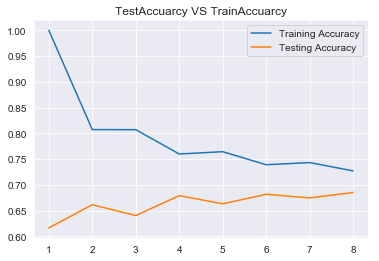

In [51]:
plt.title("TestAccuarcy VS TrainAccuarcy")
sns.lineplot(y = train_accuracy, x = neighbors)
sns.lineplot(y = test_accuracy, x = neighbors)
plt.legend(labels = ['Training Accuracy','Testing Accuracy'])

__let's use gridsearch method to find the best score and neighbour__

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
#param_grid_1 = {'n_neighbors': np.arange(1,50)}

In [54]:
#knn = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn, param_grid= param_grid_1,cv = 5)

In [55]:
#knn_cv.fit(x,y)

In [56]:
#print(knn_cv.best_score_)
#print(knn_cv.best_params_)
#print(knn_cv.best_estimator_)

In [57]:
#knn_1 = KNeighborsClassifier(n_neighbors= 12)
#knn_1.fit(X_train,y_train)

In [58]:
#knn_1.score(X_train,y_train)

In [59]:
test_subdf_train = test_subdf.drop(columns= 'education')

In [60]:
test_subdf_train.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing
10,29934,2.427201,1,1,30,0.0,1,0,0,77,...,0,0,0,0,0,0,0,1,0,1
21,33332,2.247230,1,1,41,4.0,11,0,0,57,...,0,0,0,0,1,0,0,0,0,1
32,35465,2.336289,0,1,24,1.0,2,0,0,48,...,0,0,0,0,0,0,1,0,0,1
43,17423,2.285814,1,3,24,2.0,2,0,0,48,...,0,0,0,0,0,0,1,0,1,0
82,66013,2.285814,1,2,25,3.0,2,0,0,53,...,0,0,0,0,0,0,1,0,0,1


In [61]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
y_pred_values = knn.predict(test_subdf_train)

In [62]:
len(y_pred_values)

2409

In [63]:
test_subdf_train['education'] = y_pred_values
test_subdf_train.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing,education
10,29934,2.427201,1,1,30,0.0,1,0,0,77,...,0,0,0,0,0,0,1,0,1,2.0
21,33332,2.247230,1,1,41,4.0,11,0,0,57,...,0,0,0,1,0,0,0,0,1,2.0
32,35465,2.336289,0,1,24,1.0,2,0,0,48,...,0,0,0,0,0,1,0,0,1,2.0
43,17423,2.285814,1,3,24,2.0,2,0,0,48,...,0,0,0,0,0,1,0,1,0,2.0
82,66013,2.285814,1,2,25,3.0,2,0,0,53,...,0,0,0,0,0,1,0,0,1,2.0


In [64]:
# Need to mergre test_subdf_train and train_subdf
print('length of Entire Data is :', len(df))
print('length of train Data of submodel is :', len(train_subdf))
print('length of test Data of submodel is :', len(test_subdf_train))

length of Entire Data is : 54808
length of train Data of submodel is : 52399
length of test Data of submodel is : 2409


In [65]:
dummy = pd.concat([train_subdf,test_subdf_train], axis= 0)
dummy.head(15)

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing,education
0,65438,2.336289,0,1,35,5.0,8,1,0,49,...,0,0,0,0,0,1,0,0,1,3.0
1,65141,2.258350,1,1,30,5.0,4,0,0,60,...,0,0,0,1,0,0,0,1,0,2.0
2,7513,2.148148,1,1,34,3.0,7,0,0,50,...,0,0,0,0,0,1,0,0,1,2.0
3,2542,2.427201,1,2,39,1.0,10,0,0,50,...,0,0,0,0,0,1,0,1,0,2.0
4,48945,2.148148,1,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,1,1,0,2.0
5,58896,2.285814,1,2,31,3.0,7,0,0,85,...,0,0,0,0,0,0,0,0,1,2.0
6,20379,2.270907,0,1,31,3.0,5,0,0,59,...,0,0,0,1,0,0,0,1,0,2.0
7,16290,2.136986,1,1,33,3.0,6,0,0,63,...,0,0,0,1,0,0,0,0,1,3.0
8,73202,2.270907,1,1,28,4.0,5,0,0,83,...,0,0,0,0,0,0,0,1,0,2.0
9,28911,2.427852,1,1,32,5.0,5,1,0,54,...,0,0,0,0,0,1,0,0,1,3.0


In [66]:
ver = pd.DataFrame(columns= {'before','After'})
ver['before'] = df['employee_id']
ver['After'] = dummy['employee_id']
ver.head()

,After,before
0,65438,65438
1,65141,65141
2,7513,7513
3,2542,2542
4,48945,48945


In [67]:
# verifying both the employee id's as it is primary key, checking wether the rows are misplaced or not.
q = np.equal(ver['before'],ver['After'])
q.unique()

array([ True])

__So finally done with missing values..lets add them to orginal dataframe df__

In [68]:
#lets fill the missging value for previous_year_rating in main data.
df['previous_year_rating'] = dummy['previous_year_rating']

In [69]:
# Lets fill the missing values for education {'Master\'s & above':3,'Bachelor\'s':2,'Below Secondary':1}

conditions = [(dummy['education'] == 3.0),
              (dummy['education'] == 2.0),
              (dummy['education'] == 1.0)
             ]
choices = ["Master's & above", "Bachelor's", "Below Secondary"]
dummy['education'] = np.select(condlist= conditions, choicelist= choices)
dummy.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing,education
0,65438,2.336289,0,1,35,5.0,8,1,0,49,...,0,0,0,0,0,1,0,0,1,Master's & above
1,65141,2.258350,1,1,30,5.0,4,0,0,60,...,0,0,0,1,0,0,0,1,0,Bachelor's
2,7513,2.148148,1,1,34,3.0,7,0,0,50,...,0,0,0,0,0,1,0,0,1,Bachelor's
3,2542,2.427201,1,2,39,1.0,10,0,0,50,...,0,0,0,0,0,1,0,1,0,Bachelor's
4,48945,2.148148,1,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,1,1,0,Bachelor's


In [70]:
df['education'] = dummy['education']
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [71]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

__So, Finally done with the fill null values in main dataframe. Lets start univariate and bi-variate analyis__

# # Uni-Variate and Bi-Variate Analysis

__Here, we explore the variable one by one. For continious variable we need to understand the cental tendency and spread of data.
On otherhand for categorical variables we use frequency table to understand the distribution of each category.__

Ok, Let's Start with the target variable

In [72]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

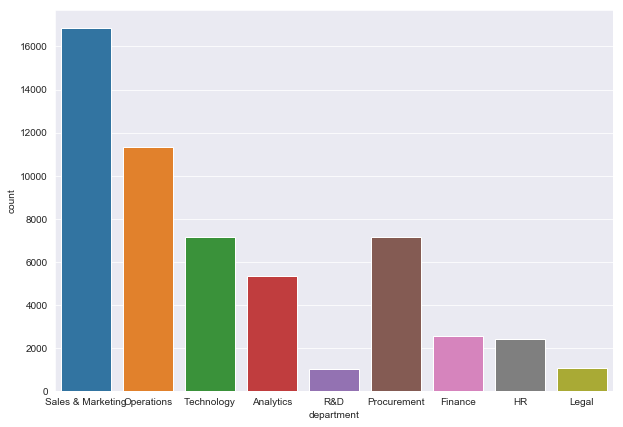

In [73]:
# lets go with department first with target
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'department')

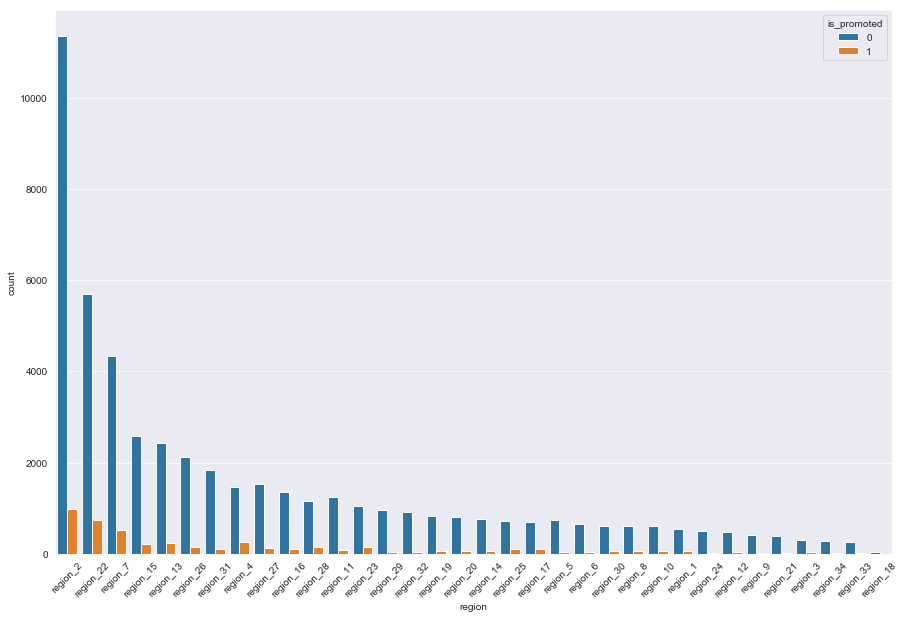

In [74]:
plt.figure(figsize=(15,10))
chart = sns.countplot(data = df, x = 'region', order= df['region'].value_counts().index, hue = 'is_promoted')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.show()

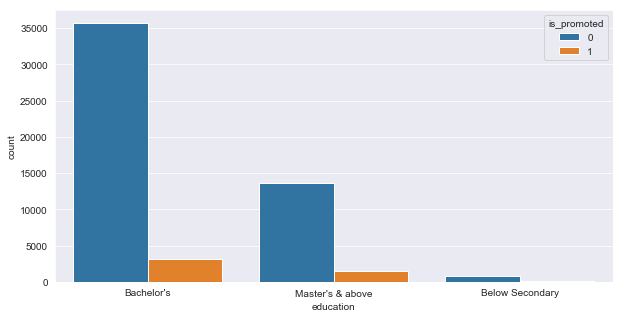

In [75]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data = df, x = 'education',hue = 'is_promoted',order= df['education'].value_counts().index)
plt.show()

__From above graph we can notice that employees with below Secondary have less promotions.__

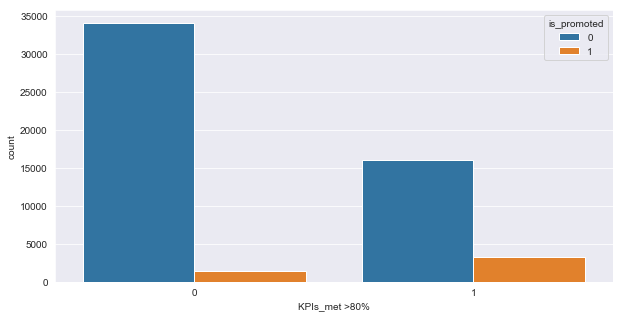

In [76]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data = df, x = 'KPIs_met >80%', hue = 'is_promoted')
plt.show()

C:\Users\503093365\AppData\Local\ana_py\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

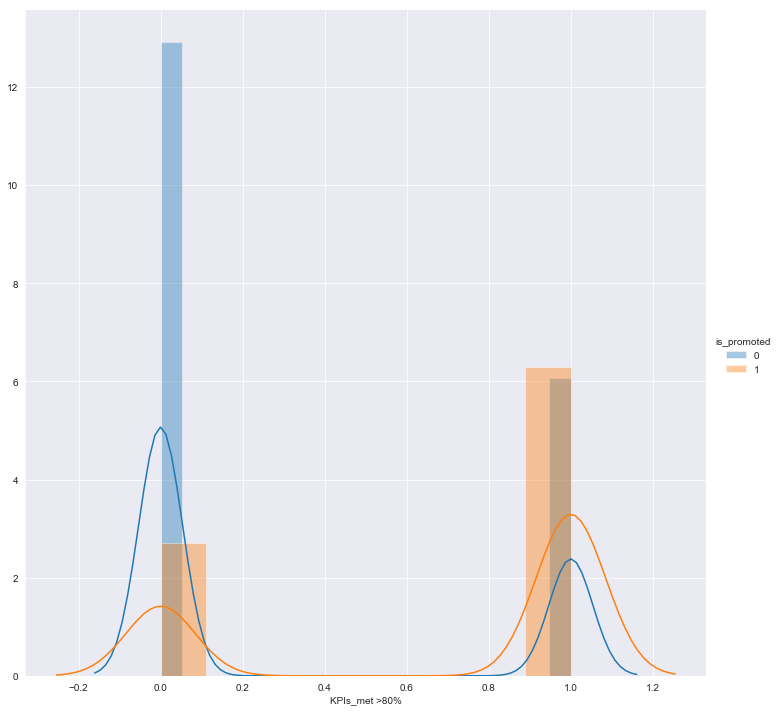

In [77]:
plt.figure(figsize=(20,5))
sns.FacetGrid(data = df, hue= 'is_promoted', size= 10).map(sns.distplot,'KPIs_met >80%').add_legend()
plt.show()

__From above graph we can notice that employees whose KPI is > 80 they have good promotions.__

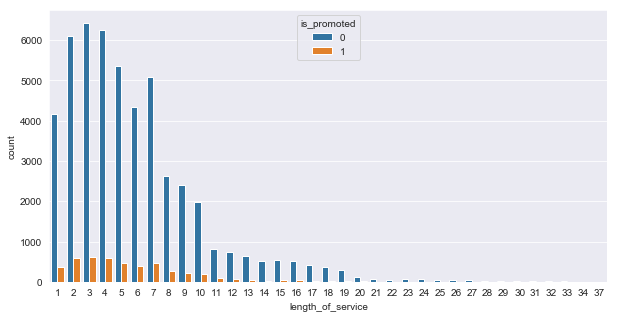

In [78]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data = df, x = 'length_of_service', hue = 'is_promoted')
plt.show()

__Employees with 2,3,4,5 and 7 year service have good promotion rate__

<Figure size 2880x4320 with 0 Axes>

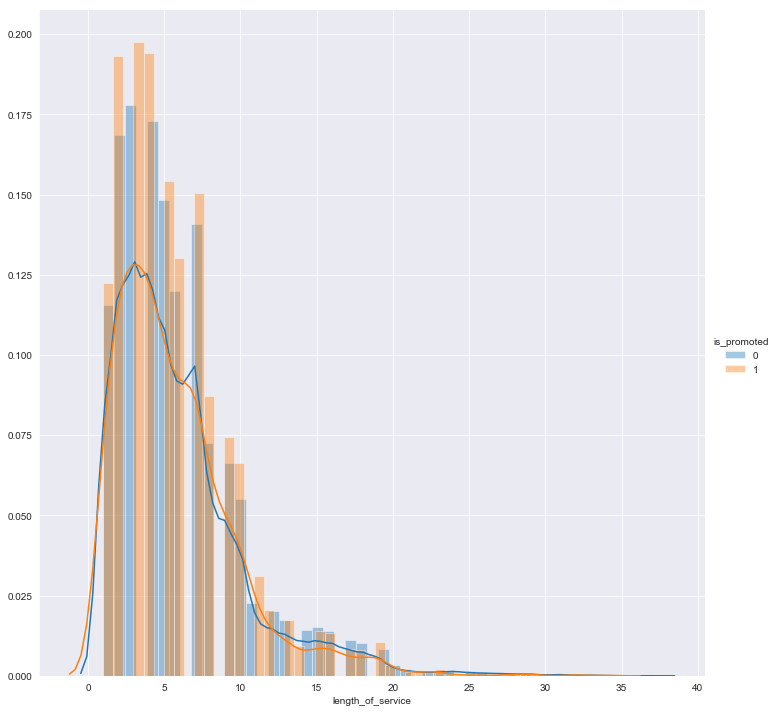

In [79]:
plt.figure(figsize=(40,60))
sns.FacetGrid(data = df, hue= 'is_promoted',height= 10).map(sns.distplot,'length_of_service').add_legend()

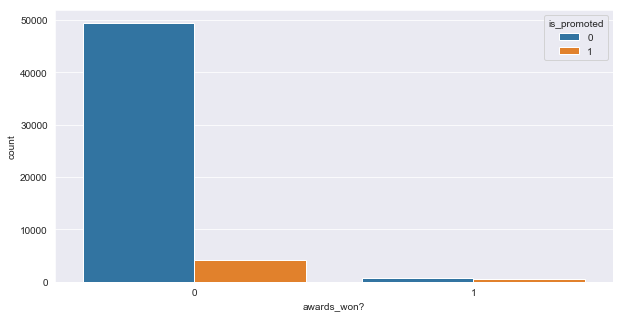

In [80]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data = df, x = 'awards_won?', hue = 'is_promoted')
plt.show()

<Figure size 2880x4320 with 0 Axes>

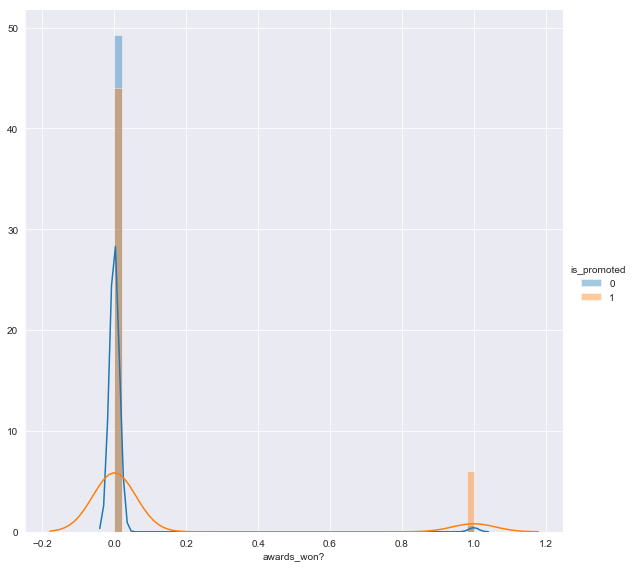

In [81]:
plt.figure(figsize=(40,60))
sns.FacetGrid(data = df, hue= 'is_promoted',height= 8).map(sns.distplot,'awards_won?').add_legend()

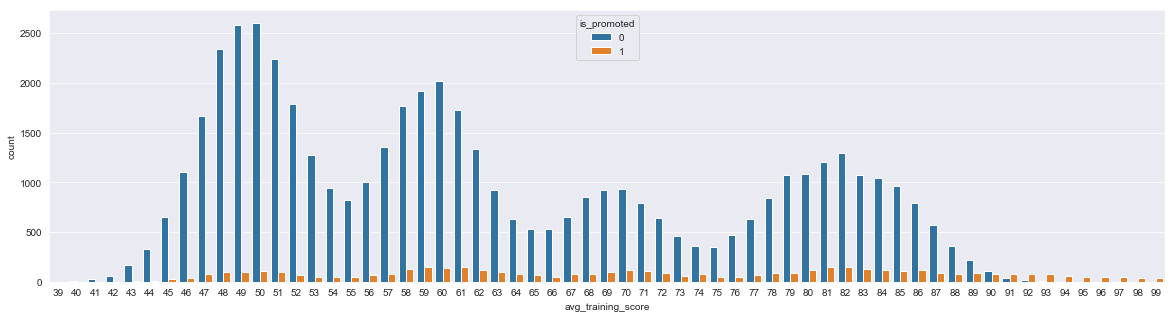

In [82]:
plt.figure(figsize=(20,5))
chart = sns.countplot(data = df, x = 'avg_training_score', hue = 'is_promoted')
plt.show()

C:\Users\503093365\AppData\Local\ana_py\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

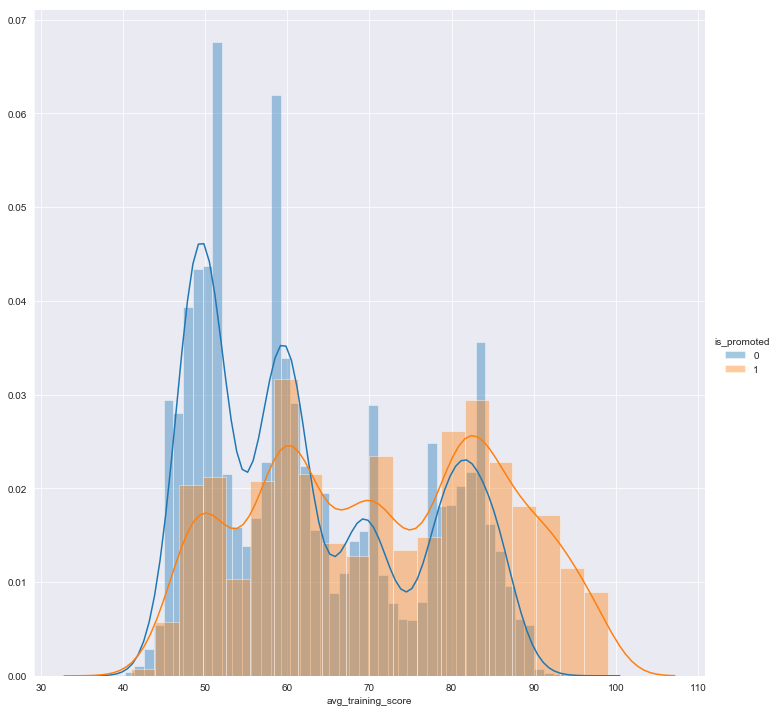

In [83]:
plt.figure(figsize=(15,5))
sns.FacetGrid(data = df, hue= 'is_promoted', size= 10).map(sns.distplot,'avg_training_score').add_legend()
plt.show()

__By observing above graphs, We can say that there is linear Relationship between categories in features and the target feature, That means, categories which has more count then they have high rate of promotion's comapred to others.
And employess having "avg_training_score" > 85 has good ratio of promotion.__

### NextSteps :
   * LabelEncoding the df
   * Pass df to models for training

# #  __Label Encoding__

lets see to which features need to encode.

In [84]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


These are the features need to encode __'department','region','education','gender','recruitment_channel'__
Lets use,
* Mean encoding for __'region'__ as it has many categories 
* Label encoding for __'education'__ and __'gender'__
* One-Hot Encoding for __'recruitment_channel','department'__

In [85]:
# Label Encoding 'education'
mapping = {'Master\'s & above':2,'Bachelor\'s':1,'Below Secondary':0}
for keys in mapping:
    mapping[keys] = int(mapping[keys])
df['education'] = df['education'].map(mapping)

In [86]:
# Mean Encoding 'region'
reg_dict_bypromoted = dict()
reg_dict_bypromoted = df.groupby('region')['is_promoted'].mean()
df.region = df.region.map(reg_dict_bypromoted)
df.region.unique()

array([0.10654553, 0.11418793, 0.06064073, 0.11659574, 0.06327434,
       0.08012639, 0.05764706, 0.02739726, 0.09508197, 0.14445097,
       0.04325956, 0.05684755, 0.07905983, 0.07496977, 0.05627376,
       0.04569191, 0.1168437 , 0.13693467, 0.08685801, 0.06962457,
       0.12576313, 0.0787037 , 0.07896323, 0.08980213, 0.066     ,
       0.04379562, 0.08091603, 0.04232804, 0.04637681, 0.03717472,
       0.03543307, 0.10693642, 0.01904762, 0.03225806])

In [87]:
# label Encoding 'gender'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df.gender)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,0.106546,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,0.114188,1,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,0.060641,1,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,0.116596,1,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,0.063274,1,1,other,1,45,3.0,2,0,0,73,0


In [88]:
# One-Hot Encoding for 'recruitment_channel','department'
df_dep_main = pd.DataFrame()
df_dep_main = pd.get_dummies(df['department'])
df_dep_main.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [89]:
df = pd.concat([df,df_dep_main], axis= 1)
df = df.drop(columns= {'department','R&D'})
df.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,avg_training_score,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology
0,65438,0.106546,2,0,sourcing,1,35,5.0,8,1,...,49,0,0,0,0,0,0,0,1,0
1,65141,0.114188,1,1,other,1,30,5.0,4,0,...,60,0,0,0,0,0,1,0,0,0
2,7513,0.060641,1,1,sourcing,1,34,3.0,7,0,...,50,0,0,0,0,0,0,0,1,0
3,2542,0.116596,1,1,other,2,39,1.0,10,0,...,50,0,0,0,0,0,0,0,1,0
4,48945,0.063274,1,1,other,1,45,3.0,2,0,...,73,0,0,0,0,0,0,0,0,1


In [90]:
df_rec_main = pd.DataFrame()
df_rec_main = pd.get_dummies(df['recruitment_channel'])
df_rec_main.head()

,other,referred,sourcing
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [91]:
df = pd.concat([df,df_rec_main],sort= False, axis= 1)
df = df.drop(columns= {'recruitment_channel','referred'})
df.head()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing
0,65438,0.106546,2,0,1,35,5.0,8,1,0,...,0,0,0,0,0,0,1,0,0,1
1,65141,0.114188,1,1,1,30,5.0,4,0,0,...,0,0,0,0,1,0,0,0,1,0
2,7513,0.060641,1,1,1,34,3.0,7,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2542,0.116596,1,1,2,39,1.0,10,0,0,...,0,0,0,0,0,0,1,0,1,0
4,48945,0.063274,1,1,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,1,1,0


In [92]:
columns_order = [['employee_id', 'region', 'education', 'gender', 'no_of_trainings',
       'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'Analytics',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'Sales & Marketing', 'Technology', 'other', 'sourcing','is_promoted']]

In [93]:
df = df[['employee_id', 'region', 'education', 'gender', 'no_of_trainings',
       'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'Analytics',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'Sales & Marketing', 'Technology', 'other', 'sourcing','is_promoted']]
df.head(15)

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,other,sourcing,is_promoted
0,65438,0.106546,2,0,1,35,5.0,8,1,0,...,0,0,0,0,0,1,0,0,1,0
1,65141,0.114188,1,1,1,30,5.0,4,0,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,0.060641,1,1,1,34,3.0,7,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2542,0.116596,1,1,2,39,1.0,10,0,0,...,0,0,0,0,0,1,0,1,0,0
4,48945,0.063274,1,1,1,45,3.0,2,0,0,...,0,0,0,0,0,0,1,1,0,0
5,58896,0.080126,1,1,2,31,3.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0
6,20379,0.057647,1,0,1,31,3.0,5,0,0,...,0,0,0,1,0,0,0,1,0,0
7,16290,0.027397,2,1,1,33,3.0,6,0,0,...,0,0,0,1,0,0,0,0,1,0
8,73202,0.057647,1,1,1,28,4.0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
9,28911,0.095082,2,1,1,32,5.0,5,1,0,...,0,0,0,0,0,1,0,0,1,0


Done With Encoding.!!!

### Using Logistic Regression for Modelling

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_promoted',axis=1), 
           df['is_promoted'], test_size=0.30, 
            random_state=101)

In [95]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
#predictions
Predictions = logmodel.predict(X_test)

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,Predictions))
print('------------------------------------------')
print('Here is the Accuarcy: ',accuracy_score(y_test,Predictions))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     15061
          1       0.00      0.00      0.00      1382

avg / total       0.84      0.92      0.88     16443

------------------------------------------
Here is the Accuarcy:  0.9159520768716171


C:\Users\503093365\AppData\Local\ana_py\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[15061     0]
 [ 1382     0]]


### Reaching to conlusion based on above modelling metrics, found below points:

- We got 91% accuracy which is not bad at all.


- True positive: 15061 (We predicted a positive result and it was positive)
- True negative: 0 (We predicted a negative result and it was negative)
- False positive: 0 (We predicted a positive result and it was negative)
- False negative: 1382 (We predicted a negative result and it was positive)